# [Pandas - Merge and Join Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

Merging and joining dataframes critical to any data analyst, data scientist or machine learning engineer who needs to work with data. This project will help you master the process of merging datasets, that is, joining two datasets together based on common columns between them. 

## Why “Merge”?

You have probably encountered multiple data tables that have different bits of information that you would like to bring together for analysis. The power of pandas merge function comes in to efficiently combine multiple data tables together into a single dataframe for further analysis. 

“Merging” two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. The words “merge” and “join” are used interchangeably in Pandas. Despite the fact that Pandas has both “merge” and “join” functions, essentially they both do very similar things.

Key topics we will be covering:

1. What is a merge or join of two dataframes?
2. What are inner, outer, left and right merges?
3. How to merge two dataframes with different common column names?

Here's a quick introduction to how this works - The Pandas merge() command takes the left and right dataframes, matches rows based on the “on” columns, and performs different types of merges – left, right, etc.

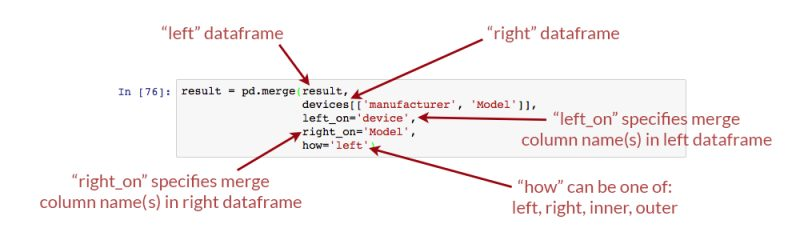

## Example Data

Before we set out on our journey, lets take a quick look at the data we will be using. This data is from the KillBiller application (now defunct). KillBiller used to compare phone bills across different carriers and help users find the best plans. Our example dataset has been deidentified for our purposes here. 

We will be using three files - 

- user_usage.csv – dataset containing users' monthly mobile usage statistics
- user_device.csv – dataset containing device information (cell phone model, mobile OS, and version) for the users
- android_devices.csv – dataset with device and manufacturer data, which lists devices and their model code

Let's start by loading our datasets - 

In [70]:
import pandas as pd

In [71]:
user_usage = pd.read_csv('https://raw.githubusercontent.com/anikannal/data/master/user_usage.csv')
user_device = pd.read_csv('https://raw.githubusercontent.com/anikannal/data/master/user_device.csv')
devices = pd.read_csv('https://raw.githubusercontent.com/anikannal/data/master/android_devices.csv')

Now, let's look at the data itself - 

In [72]:
user_usage.head() # Sample usage information from the KillBiller application 
                  # showing monthly mobile usage statistics for a subset of users.

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [73]:
user_device.head() # User information from KillBiller application 
                   # giving the device and OS version for individual “uses” of the KillBiller application.

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [74]:
devices.head(10) # Device data, containing manufacturer and model details.

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


**Linking Attributes**

When you merge two DataFrames the `.merge()` function joins/merges rows from one with the appropriate rows from another. But how does it pick the right rows to join/merge?

The DataFrames you wish to join/merge should have atleast one common attribute (column) - this attribute will act as the linking attribute on which you will be joining/merging the DataFrames. The values in this column will help the `.merge()` function link the appropriate rows from the two DataFrames you wish to merge.

There are linking attributes between the sample datasets that are important to note 

- **“use_id”** is shared between the **user_usage** and **user_device** DataFrames


- **“device”** column of **user_device** and **“Model”** column of the **devices** dataset contain common codes

We can do a quick check of the common values with the `.isin()` method - 

In [75]:
user_usage['use_id'].isin(user_device['use_id'])

0       True
1       True
2       True
3       True
4       True
       ...  
235    False
236    False
237    False
238    False
239    False
Name: use_id, Length: 240, dtype: bool

In [76]:
user_device['device'].isin(devices['Model'])

0      False
1       True
2       True
3      False
4       True
       ...  
267     True
268    False
269    False
270    False
271     True
Name: device, Length: 272, dtype: bool

## The `.merge()` function

The `.merge()` function has two different versions - 
1. One is a standalone function, part of the pandas library, that takes two DataFrames (left and right) as arguments
2. Second one is a method that can be called on the first (left) DataFrame object and takes the second (right) DataFrame as an argument

Both return a merged/joined DataFrame as the output. Apart from the fact that one is a library function vs. the other one is a class method, there are minor differences between the two.

We will be using the first one (pandas library function) for our project here.

In [77]:
# Option 1 - standalone function in the pandas library - 
# checkout the pandas documentation for pd.merge()

?pd.merge

#### Here's a quick explanation of some of the key parameters - 

    pandas.merge(
             
             left,              ## Left DataFrame
             
             right,             ## Right DataFrame
             
             how='inner',       ## Type of join/merge - possible values - 'left', 'right', 'outer', 'inner'
                                ## Default value is 'inner'
             
             on=None,           ## Column you wish to merge on, if the column name is same for the two DataFrames
                                ## Either 'on' or next two in pair 'left_on' and 'right_on' HAVE to be specified
             
             left_on=None,      ## Column name to merge on from the left DataFrame
                                ## This and the next parameter work in pair
             
             right_on=None,     ## Column name to merge on from the right DataFrame
                                ## This and the previous parameter work in pair
             
             left_index=False, 
             
             right_index=False, 
             
             sort=False,        ## If the result is to be sorted
             
             suffixes='_x', '_y', 
             
             copy=True, 
             
             indicator=False,   ## If you wish to indicate whether the row existed in left, right, or both DFs
                                ## This parameter will add a column _merge to the resulting DataFrame
             
             validate=None
             
             )

**Let's get to our first merge!**

- We will be merging the 'user_usage' dataset with the 'user_device' dataset.  
        - Left DataFrame: user_usage
        - Right DataFrame: user_device

- As observed previously - the 'use_id' column is common between the two datasets.
        - on: use_id

In [78]:
# Merging the two DataFrames on 'use_id' and storing the resulting DataFrame in 'result'
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')


# Let's see what the resulting DataFrame looks like
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


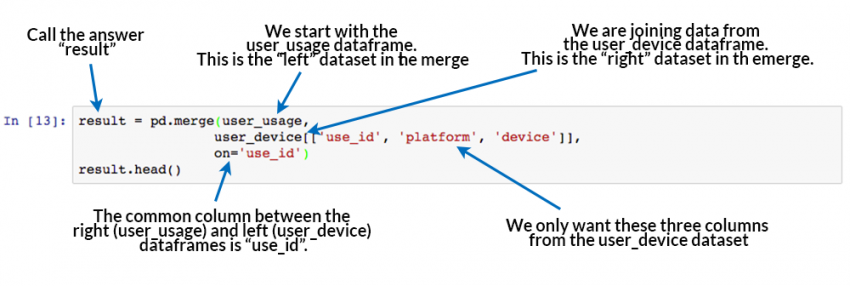

#### Let's try to answer a couple of questions - 

1. Which of the two user types consume more data per capita - Android or iOS?
        - we will need the 'monthly_mb' column from user_usage and the 'platform' column from user_device
2. What is the total mb of data used by Android users?
        - we will need the 'monthly_mb' column from user_usage and 'platform' column from user_device
        
Luckily we have already merged the two DataFrames and we can write our usual summarization functions on the resulting DataFrame.

In [79]:
# Question 1 - Which of the two user types consume more data per capita - Android or iOS?

# 1. We will group by all the platforms
# 2. Choose only the monthly_mb column
# 3. Find the average data usage

result.groupby('platform')['monthly_mb'].mean()

platform
android    4221.387834
ios         961.155000
Name: monthly_mb, dtype: float64

In [80]:
# Question 2 - What is the total number of messages sent out by Android users?

# 1. We will pick the monthly_mb column
# 2. Filter rows where platform is android
# 3. Find the total of monthly_mb for all rows that match the filter

result['monthly_mb'][result['platform']=='android'].sum()

662757.8899999999

## Inner, Left, Right, and Outer Merges

There are four different ways you can join/merge DataFrames - 

1. Inner merge - only keep rows where the merge “on” value exists in both the left and right dataframes.
2. Left merge - Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.
3. Right merge - Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left dataframe, add empty / NaN values in the result.
4. Outer merge or Full merge - A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

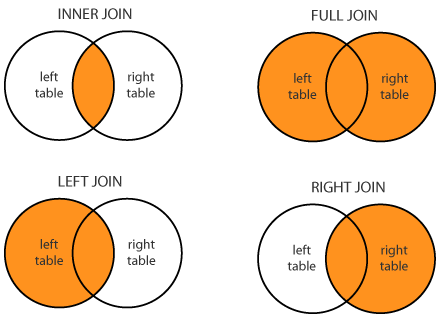

### Inner Merge

This the default merge type for the `.merge()` function. If nothing is specified for the *how* parameter, the function assumes its an **inner** merge.

An **inner** merge is similar to an intersection set. An **inner** merge gives us a DataFrame with only the rows that have the 'on' value in both left and right DataFrames. (refer to the **inner** join illustration above)

Let's see how this looks in action - 

In [81]:
result_inner = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on = 'use_id',
                 how = 'inner')

Let's take a quick look at the shape of the left, right DataFrames and the result_inner DataFrame.

In [82]:
user_usage.shape

(240, 4)

In [83]:
user_device.shape

(272, 6)

In [84]:
result_inner.shape

(159, 6)

What do you notice? There are 159 rows in the left DataFrame (user_usage) that have matching values for 'use_id' column in the right DataFrame (user_device). 

Lets verify that a little differently. Can you find the count of all 'use_id' values from 'user_usage' that can also be found in 'user_device'?

In [85]:
user_usage['use_id'].isin(user_device['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

You will notice the 'True' count will match the number of rows in the 'result_inner' DataFrame.

### Left Merge

**Left** join/merge, also known as **Left Outer** Join, returns a DataFrame containing all the rows of the left DataFrame. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe. (take a look at the **left** join visual illustration earlier)

In [86]:
result_left = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='left')

Let's take a quick look at the shape of the left, right DataFrames and the result_left DataFrame.

In [87]:
# Left DataFrame

user_usage.shape

(240, 4)

In [88]:
# Right DataFrame

user_device.shape

(272, 6)

In [89]:
result_left.shape

(240, 6)

You will notice the number of rows in the 'result_left' DataFrame matches the number of rows in the **left** DataFrame (user_usage).

Let's verify this another way - 

- check for the number of null counts for a column which was originally in the left DataFrame (e.g. 'monthly_mb'). As one might expect, there are no null counts. 
- check for number of null counts for a column which is originally in the right DataFrame (e.g. 'platform'). You will notice only 159 rows (recollect the count from the inner join) have a non-null value while 81 have null values. As you know a **Left** merge is simply an **inner** merge plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe. 

In [90]:
result_left['monthly_mb'].isnull().value_counts()

False    240
Name: monthly_mb, dtype: int64

In [91]:
result_left['platform'].isnull().value_counts()

False    159
True      81
Name: platform, dtype: int64

### Right Merge

**Right** join/merge, also known as **Right Outer** Join, returns a DataFrame containing all the rows of the right DataFrame. It is simply an inner join plus all the non-matching rows of the right dataframe filled with NaN for columns of the left dataframe. (take a look at the **right** join visual illustration earlier)

In [92]:
result_right = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='right')

Let's take a quick look at the shape of the left, right DataFrames and the 'result_right' DataFrame.

In [93]:
# Left DataFrame

user_usage.shape

(240, 4)

In [94]:
# Right DataFrame

user_device.shape

(272, 6)

In [95]:
result_right.shape

(272, 6)

You will notice the number of rows in the 'result_right' DataFrame matches the number of rows in the **right** DataFrame (user_device).

Let's verify this another way -

- check for the number of null counts for a column which was originally in the right DataFrame (e.g. 'platform'). As one might expect, there are no null counts.
- check for number of null counts for a column which is originally in the left DataFrame (e.g. 'monthly_mb'). You will notice only 159 rows (recollect the count from the inner join) have a non-null value while 113 have null values. As you know a **right** merge is simply an **inner** merge plus all the non-matching rows of the **right** dataframe filled with NaN for columns of the left dataframe.

In [96]:
result_right['platform'].isnull().value_counts()

False    272
Name: platform, dtype: int64

In [97]:
result_right['monthly_mb'].isnull().value_counts()

False    159
True     113
Name: monthly_mb, dtype: int64

### Outer Merge

**Outer or Full** Merge/Join, also known as **Full Outer** Merge/Join, returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

An **outer** merge is an equivalent of a union. (take a look at the **outer** join visual illustration earlier)

In [98]:
result_outer = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='outer')

Let's take a quick look at the shape of the left, right DataFrames and the 'result_outer' DataFrame.

In [99]:
# Left DataFrame

user_usage.shape

(240, 4)

In [100]:
# Right DataFrame

user_device.shape

(272, 6)

In [101]:
result_outer.shape

(353, 6)

You will notice the number of rows in the 'result_outer' DataFrame matches the number of rows from the **inner** join (common to both left and right) + number of rows that are exclusive/unique to each DataFrame (113 in left and 81 in right).

Let's verify this another way -

- check for the number of null counts for a column which was originally in the left DataFrame (e.g. 'monthly_mb'). As one might expect, there are 113 null counts.
- check for number of null counts for a column which is originally in the right DataFrame (e.g. 'platform'). As one might expect, there are 81 null counts. 

As you know a **outer** merge is a union of all rows. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

In [102]:
result_outer['monthly_mb'].isnull().value_counts()

False    240
True     113
Name: monthly_mb, dtype: int64

In [103]:
result_outer['platform'].isnull().value_counts()

False    272
True      81
Name: platform, dtype: int64

## Merge Indicator

You can add a column to the result DataFrame to tag rows based on their origin.

This column can have one of three possible values based on which DataFrame the row exists in - 

- Left Only
- Right Only
- Both

Let's try the merge indicator with a full/outer merge. You will notice all three indicators in this case - as you know an outer merge is a union of all rows on the linking column.

In [104]:
result_outer = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='outer', 
                 indicator=True)

In [105]:
result_outer.iloc[[1,4,5,7,180,181,182,301,302,303]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,_merge
1,1710.08,136.88,7267.55,22788,android,SM-G930F,both
4,71.59,79.26,1557.33,22792,android,SM-G361F,both
5,71.59,79.26,1557.33,22793,android,SM-G361F,both
7,71.59,79.26,519.12,22795,android,SM-G361F,both
180,632.06,120.46,1453.16,23484,NaN,NaN,left_only
181,15.52,18.50,1557.33,23536,NaN,NaN,left_only
182,583.73,216.52,1441.29,23548,NaN,NaN,left_only
301,NaN,NaN,NaN,22917,ios,"iPhone6,2",right_only
302,NaN,NaN,NaN,22918,ios,"iPhone5,2",right_only
303,NaN,NaN,NaN,22919,ios,"iPad4,1",right_only


What do we see for a inner merge? As you know, inner merge is an intersection of the two DataFrames on the linking column - all rows will belong to both the DataFrames.

In [106]:
result_inner = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='inner',
                 indicator=True)

In [107]:
result_inner['_merge'].unique()

[both]
Categories (1, object): [both]

What do we see for a left merge? As you know, left merge has all rows from the left DataFrame - the `_merge` column will have either left_only or both as values.

In [108]:
result_left = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='left',
                 indicator=True)

In [109]:
result_left['_merge'].unique()

[both, left_only]
Categories (2, object): [both, left_only]

What do we see for a right merge? As you know, right merge has all rows from the right DataFrame - the `_merge` column will have either right_only or both as values.

In [110]:
result_right = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='right',
                 indicator=True)

In [111]:
result_right['_merge'].unique()

[both, right_only]
Categories (2, object): [both, right_only]

## Bringing it all together

In [112]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id',
                 how='left')

In [113]:
devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)

In [114]:
result = pd.merge(result, 
                  devices[['manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='left')

In [115]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [116]:
result.groupby("manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    })

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
manufacturer,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16
